In [2]:
#importación librerías
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

La base de datos encontrada en Kaggle para trabajar en Machine Learning es bastante completa y ya está limpia

In [3]:
dataset = pd.read_csv("database_numbers.csv")
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3421 non-null   int64  
 1   Director_Name                 3421 non-null   object 
 2   Runtime                       3421 non-null   float64
 3   Genres                        3421 non-null   object 
 4   Movie_Title                   3421 non-null   object 
 5   Plot_Keywords                 3357 non-null   object 
 6   Content_Rating                3324 non-null   object 
 7   Budget                        3421 non-null   float64
 8   Aspect_Ratio                  3421 non-null   float64
 9   Movie_ID                      3421 non-null   int64  
 10  Release_Date                  3421 non-null   object 
 11  Revenue                       3421 non-null   float64
 12  Lead_Actor_ID                 3421 non-null   float64
 13  Lea

,Unnamed: 0,Director_Name,Runtime,Genres,Movie_Title,Plot_Keywords,Content_Rating,Budget,Aspect_Ratio,Movie_ID,...,Director_Movie_Count,Director_Ratio,Keywords_Avg_Revenue,Keywords_Ratio,Content_Rating_Score,Studios_Avg_Movie_Revenue,Studios_Ratio,Lead_Actor_Avg_Movie_Revenue,Lead_Actor_Movie_Count,Lead_Actor_Ratio
0,0,James Cameron,154.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,PG-13,105500000.0,1.78,19995,...,6.0,7.07,2.186970e+08,5.18,2.0,3.100957e+08,4.79,3.383931e+08,4.0,6.08
1,1,Gore Verbinski,154.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,PG-13,105500000.0,2.35,285,...,7.0,2.97,2.186970e+08,3.07,2.0,3.100957e+08,3.23,2.664292e+08,21.0,2.82
2,2,Christopher Nolan,154.0,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,PG-13,105500000.0,2.35,49026,...,8.0,4.21,2.186970e+08,4.12,2.0,3.100957e+08,3.22,2.726865e+08,13.0,3.30
3,3,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,John Carter,alien|american civil war|male nipple|mars|prin...,PG-13,105500000.0,2.35,49529,...,4.0,3.21,1.840612e+08,1.66,2.0,2.561719e+08,3.04,2.935823e+08,2.0,1.24
4,4,Sam Raimi,154.0,Action|Adventure|Romance,Spider-Man 3,sandman|spider man|symbiote|venom|villain,PG-13,105500000.0,2.35,559,...,8.0,3.78,2.186970e+08,4.09,2.0,3.100957e+08,2.88,3.383931e+08,5.0,3.86


In [3]:
dataset.describe()

,Unnamed: 0,Runtime,Budget,Aspect_Ratio,Movie_ID,Revenue,Lead_Actor_ID,Director_ID,Genre_Musical,Genre_Film-Noir,...,Director_Movie_Count,Director_Ratio,Keywords_Avg_Revenue,Keywords_Ratio,Content_Rating_Score,Studios_Avg_Movie_Revenue,Studios_Ratio,Lead_Actor_Avg_Movie_Revenue,Lead_Actor_Movie_Count,Lead_Actor_Ratio
count,3421.000000,3421.000000,3.421000e+03,3421.000000,3421.000000,3.421000e+03,3.421000e+03,3.421000e+03,3421.000000,3421.000000,...,3421.000000,3421.000000,3.421000e+03,3421.000000,3421.000000,3.421000e+03,3421.000000,3.421000e+03,3421.000000,3421.000000
mean,1710.000000,107.171326,3.312712e+07,2.067203,51436.344636,7.428430e+07,5.610097e+04,9.350105e+04,0.030693,0.001754,...,3.806489,2.201596,8.712306e+07,2.446735,2.161649,1.020158e+08,2.307463,9.073262e+07,6.348728,2.295693
std,987.701962,18.345258,3.081465e+07,0.285619,83753.216204,9.399159e+07,1.931777e+05,2.507311e+05,0.172509,0.041849,...,3.070511,1.882314,5.826410e+07,1.225956,0.931830,8.349939e+07,1.414601,9.542636e+07,6.296499,1.860778
min,0.000000,58.000000,2.180000e+02,1.180000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,855.000000,94.000000,8.000000e+06,1.850000,8871.000000,1.487000e+04,2.296000e+03,6.431000e+03,0.000000,0.000000,...,1.000000,0.620000,4.489541e+07,1.630000,2.000000,3.442941e+07,1.520000,1.190963e+07,1.000000,0.860000
50%,1710.000000,104.000000,2.500000e+07,1.850000,13551.000000,3.074914e+07,1.029700e+04,2.040000e+04,0.000000,0.000000,...,3.000000,2.000000,7.262820e+07,2.280000,2.000000,9.388431e+07,2.390000,5.871620e+07,4.000000,2.140000
75%,2565.000000,118.000000,4.700000e+07,2.350000,49051.000000,1.146608e+08,3.736600e+04,6.277300e+04,0.000000,0.000000,...,5.000000,3.200000,1.144160e+08,3.050000,3.000000,1.446959e+08,3.060000,1.425030e+08,9.000000,3.310000
max,3420.000000,154.000000,1.055000e+08,3.100000,447027.000000,2.866297e+08,1.746117e+06,1.867383e+06,1.000000,1.000000,...,11.000000,7.070000,2.186970e+08,5.180000,4.000000,3.100957e+08,5.370000,3.383931e+08,21.000000,6.985000


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Director_Name', 'Runtime', 'Genres', 'Movie_Title',
       'Plot_Keywords', 'Content_Rating', 'Budget', 'Aspect_Ratio', 'Movie_ID',
       'Release_Date', 'Revenue', 'Lead_Actor_ID', 'Lead_Actor_Name',
       'Director_ID', 'Studio_IDs', 'Studio_Names', 'Genre_Musical',
       'Genre_Film-Noir', 'Genre_Romance', 'Genre_Sport', 'Genre_Music',
       'Genre_Animation', 'Genre_Adventure', 'Genre_News', 'Genre_Sci-Fi',
       'Genre_Action', 'Genre_History', 'Genre_Comedy', 'Genre_Horror',
       'Genre_Fantasy', 'Genre_War', 'Genre_Short', 'Genre_Western',
       'Genre_Biography', 'Genre_Documentary', 'Genre_Mystery',
       'Genre_Thriller', 'Genre_Family', 'Genre_Drama', 'Genre_Crime',
       'Full_Genre', 'Release_Month', 'Director_Avg_Movie_Revenue',
       'Director_Movie_Count', 'Director_Ratio', 'Keywords_Avg_Revenue',
       'Keywords_Ratio', 'Content_Rating_Score', 'Studios_Avg_Movie_Revenue',
       'Studios_Ratio', 'Lead_Actor_Avg_Movie_Revenue',
       '

En la variable género ya se ha realizado un one hot encoder, pero vemos que no existe una columna que clasifique las películas en función de su rentabilidad

La variable Clase es la que va a definir su una película es rentable o no. Para ello, lo he diseñado de una manera simple, pero la más aceptable teniendo en cuenta la información disponible.
Las películas rentables son aquellas cuyo beneficio (revenue) es mayor que su presupuesto. Aunque en la realidad no sea del todo así, ya que existen gastos de publicidad que no reflejan los presupuestos y obliga a que la recaudación sea bastante más alta que el presupuesto

* 1 -- La pelícua es rentable
* 0 -- La película no es rentable

In [5]:
#creación de la Clase
dataset["Class"]= np.where(dataset["Revenue"]>dataset["Budget"],1,0)

A través de mapas de calor comprobamos que variables correlacionan con la variable ingresos

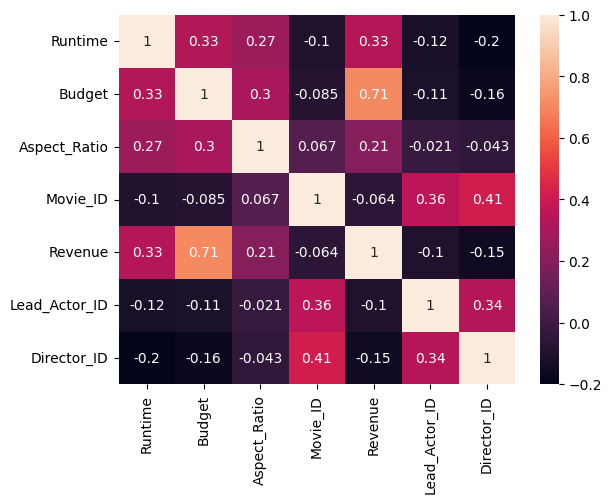

In [6]:
sns.heatmap(dataset[['Director_Name', 'Runtime', 'Genres', 'Movie_Title', 'Plot_Keywords',
       'Content_Rating', 'Budget', 'Aspect_Ratio', 'Movie_ID', 'Release_Date',
       'Revenue', 'Lead_Actor_ID', 'Lead_Actor_Name', 'Director_ID',
       'Studio_IDs', 'Studio_Names']].corr(), annot=True);

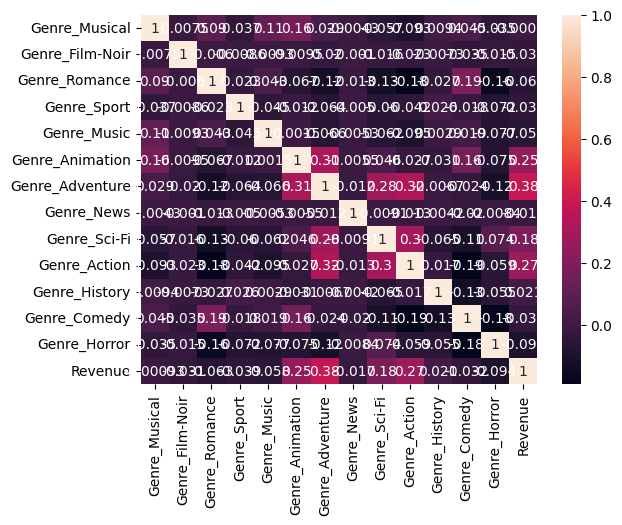

In [7]:
sns.heatmap(dataset[[
        'Genre_Musical', 'Genre_Film-Noir',
       'Genre_Romance', 'Genre_Sport', 'Genre_Music', 'Genre_Animation',
       'Genre_Adventure', 'Genre_News', 'Genre_Sci-Fi', 'Genre_Action',
       'Genre_History', 'Genre_Comedy', 'Genre_Horror', 'Revenue']].corr(), annot=True);

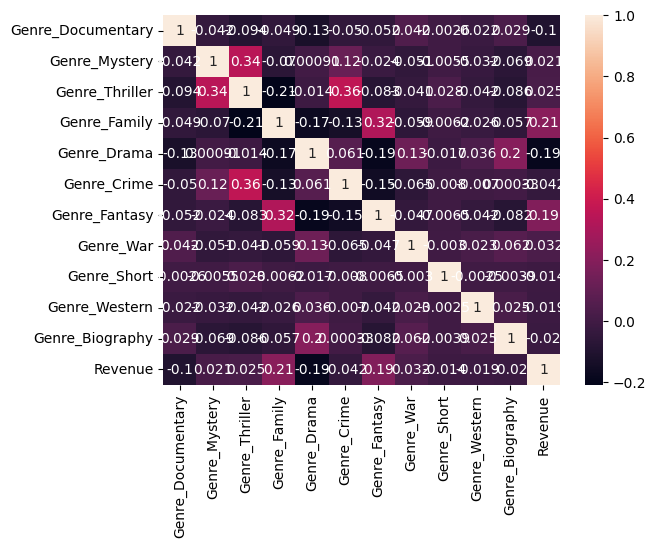

In [8]:
sns.heatmap(dataset[['Genre_Documentary', 'Genre_Mystery', 'Genre_Thriller', 'Genre_Family',
       'Genre_Drama', 'Genre_Crime', 'Genre_Fantasy',
       'Genre_War', 'Genre_Short', 'Genre_Western', 'Genre_Biography', 'Revenue']].corr(), annot=True);

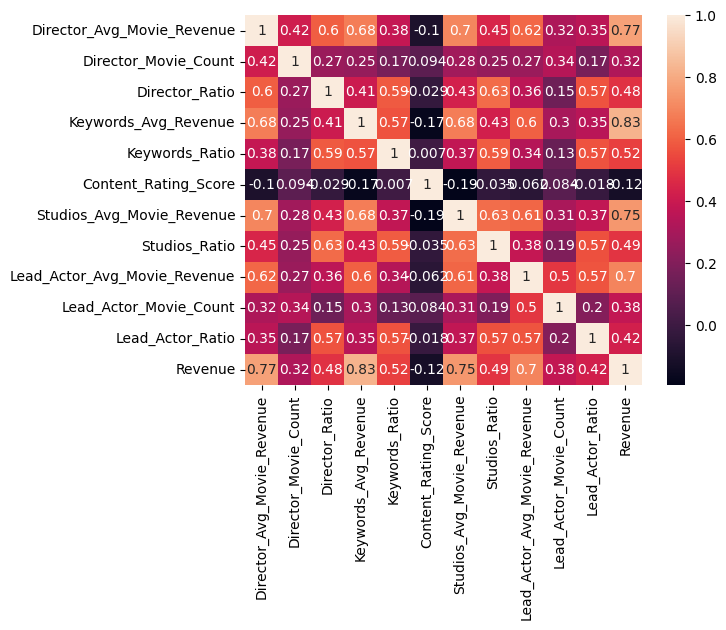

In [17]:
sns.heatmap(dataset[[
       'Director_Avg_Movie_Revenue', 'Director_Movie_Count', 'Director_Ratio',
       'Keywords_Avg_Revenue', 'Keywords_Ratio', 'Content_Rating_Score',
       'Studios_Avg_Movie_Revenue', 'Studios_Ratio',
       'Lead_Actor_Avg_Movie_Revenue', 'Lead_Actor_Movie_Count',
       'Lead_Actor_Ratio', 'Revenue']].corr(), annot=True);

 Esas variables son:
+ Director Avg Movie REvenue: La media de recaudación de cada película en función del director
+ Keywords_ Avg_REvenue: La media de recaudación de cada película en función de palabras clave sobre el argumento
+ Studios_Avg_Movie_Revenue: La media de recaudación de cada película en función del estudio de producción
+ Lead actor avg movie revenue:La media de recaudación de cada película en función del actor/atriz principal
+ Budget: El presupuesto de la película

In [10]:
##comprobación NaN. E dataset está limpio

print(dataset['Director_Avg_Movie_Revenue'].isna().sum())
print(dataset['Keywords_Avg_Revenue'].isna().sum())
print(dataset['Studios_Avg_Movie_Revenue'].isna().sum())
print(dataset['Lead_Actor_Avg_Movie_Revenue'].isna().sum())
print(dataset['Budget'].isna().sum())


0
0
0
0
0


In [11]:
#comprobación de la distribución de las clases
100* dataset.Class.value_counts() / len(dataset.Class)



1    57.643964
0    42.356036
Name: Class, dtype: float64

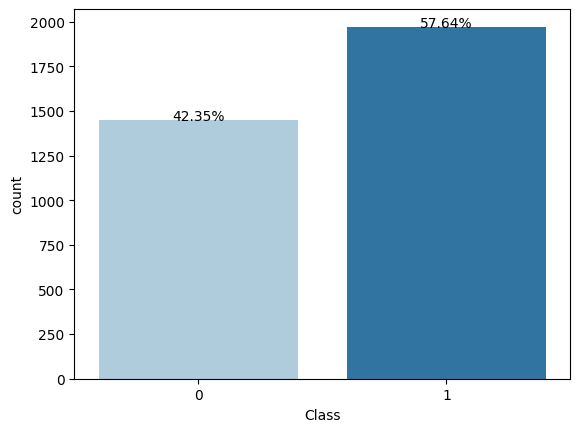

In [12]:

percentage=[42.35,57.64]

sns.set_palette("Paired")
ax=sns.countplot(x='Class', data=dataset)

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show()


En el dataset hay un 57.64% rentables frente a un 42.35% que no lo son

In [13]:
#nuevo dataframe solo con las variables que correlacionan con Class
database_final2= dataset[['Director_Avg_Movie_Revenue','Keywords_Avg_Revenue','Studios_Avg_Movie_Revenue','Lead_Actor_Avg_Movie_Revenue','Budget', 'Class']]
database_final2.head()


,Director_Avg_Movie_Revenue,Keywords_Avg_Revenue,Studios_Avg_Movie_Revenue,Lead_Actor_Avg_Movie_Revenue,Budget,Class
0,3.140352e+08,2.186970e+08,3.100957e+08,3.383931e+08,105500000.0,1
1,3.140352e+08,2.186970e+08,3.100957e+08,2.664292e+08,105500000.0,1
2,3.140352e+08,2.186970e+08,3.100957e+08,2.726865e+08,105500000.0,1
3,3.140352e+08,1.840612e+08,2.561719e+08,2.935823e+08,105500000.0,1
4,3.140352e+08,2.186970e+08,3.100957e+08,3.383931e+08,105500000.0,1


In [14]:
database_final2.to_csv("database_final2.csv")  #conversión del dataframe en un csv